In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
from ExternalFunctions import nice_string_output, add_text_to_ax

d1 = pd.read_csv('Strong.csv', header=0)
d1

,Ngangs,Time
0,1,10.768300
1,2,9.072840
2,4,3.376920
3,8,2.016990
4,16,1.357740
5,32,1.048000
6,64,0.981593
7,128,0.968966
8,256,0.923441
9,512,0.877094


In [ ]:
d2 = pd.read_csv('Weak.csv', header=0)
d2

,Ngangs,Time
0,1,0.501733
1,2,0.444790
2,4,0.444507
3,8,0.440325
4,16,0.458930
5,32,0.480731
6,64,0.494582
7,128,0.486578
8,256,0.544420
9,512,0.614593


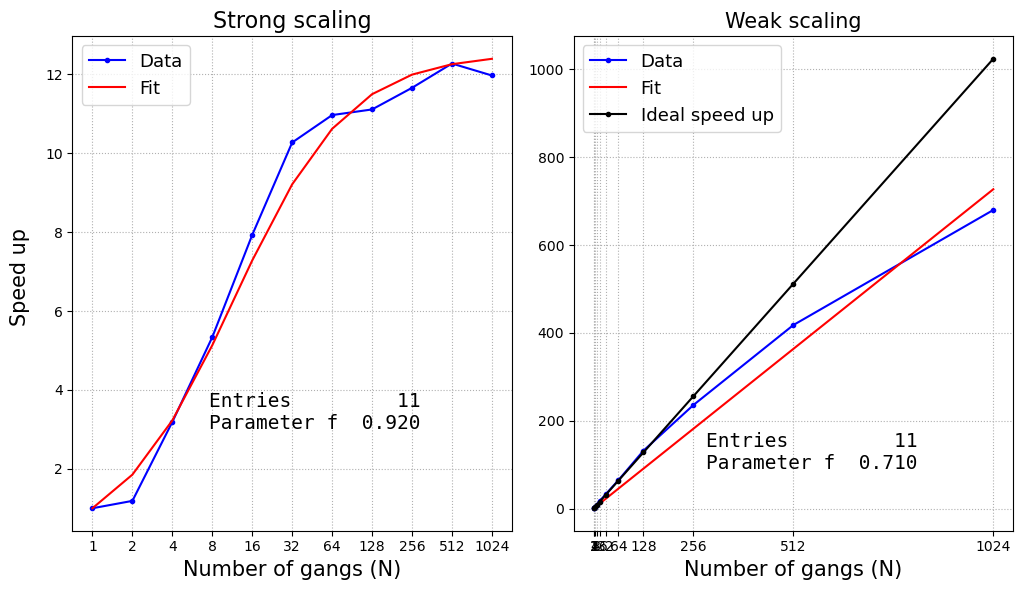

In [14]:
def Amdahl(xi, f):
    return 1/((1-f)+f/xi)

def Gustaf(x, f):
    return (1+(x-1)*f)

N = d1["Ngangs"]
T1 = d1["Time"][0]/d1["Time"]
T2 = N*d2["Time"][0]/d2["Time"]
fig, ax = plt.subplots(1,2, figsize = (10,6))

popt_Am, pcov_Am = opt.curve_fit(Amdahl, N, T1)
ax[0].plot(N, T1,".-",color="blue", label = 'Data')
ax[0].plot(N, Amdahl(N, *popt_Am), label = 'Fit', color = 'red')
ax[0].set_xscale('log', base=2)
ax[0].grid( linestyle=':')
ax[0].set_xlabel("Number of gangs (N)",fontsize=15)
ax[0].set_xticks(N)
ax[0].set_xticklabels(N)
ax[0].set_title(f'Strong scaling', fontsize = 16)
ax[0].legend(fontsize = 13)
# ax[0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (-3,-3))

d11 = {'Entries' : len(N),
        'Parameter f':  popt_Am[0]
        }

text = nice_string_output(d11, extra_spacing=2, decimals=3)
add_text_to_ax(0.31, 0.28, text, ax[0], fontsize=14)

popt_Gu, pcov_Gu = opt.curve_fit(Gustaf, N, T2)
ax[1].plot(N, T2,".-",color="blue", label ='Data')
ax[1].plot(N, Gustaf(N, *popt_Gu), label = 'Fit', color = 'red')
ax[1].plot(N, N,".-",color="black", label = 'Ideal speed up')
ax[1].set_xlabel("Number of gangs (N)",fontsize=15)
ax[1].set_xticks(N)
ax[1].set_xticklabels(N)
ax[1].set_title(f'Weak scaling', fontsize = 15)
ax[1].grid( linestyle=':')
ax[1].legend(fontsize = 13)

d21 = {'Entries' : len(N),
        'Parameter f':  popt_Gu[0]
        }

text = nice_string_output(d21, extra_spacing=2, decimals=3)
add_text_to_ax(0.3, 0.2, text, ax[1], fontsize=14)

fig.text(-0.02, 0.53, 'Speed up', va='center', rotation='vertical', fontsize = 15)
fig.tight_layout()
plt.show()